<a href="https://colab.research.google.com/github/reshminambiar/SalesDataAnalysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

Now we can read the csv file and start looking into data(specially index, null values, datatypes, remove unwanted rows/columns etc

In [2]:
df = pd.read_csv("all_data.csv")

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
df.dropna(axis=0, how='all', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [6]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

ValueError: ignored

In [ ]:
df.iloc[517]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 519, dtype: object

In [ ]:

df['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [ ]:
df['Quantity Ordered'].nunique()

10

In [ ]:
df[df['Quantity Ordered'] == 'Quantity Ordered'].count()

Order ID            355
Product             355
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address    355
dtype: int64

In [ ]:
df[df['Quantity Ordered'] == 'Quantity Ordered'][:3]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
df.drop(df.loc[df['Quantity Ordered'] == 'Quantity Ordered'].index, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [ ]:
df['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [9]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [10]:
df['Price Each'] =pd.to_numeric(df['Price Each'])

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [12]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [13]:
df.set_index('Order ID', inplace=True)

In [ ]:
df.head(3)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"


###What was the best month for sales?How much sales was there in that month?


In [14]:
df['Month'] = [x.month for x in df['Order Date']]

In [ ]:
df['Month'].dtypes

dtype('int64')

In [15]:
df['Order_amount'] = df['Quantity Ordered'] * df['Price Each']

In [16]:
sales = df.groupby('Month')['Order_amount'].sum()

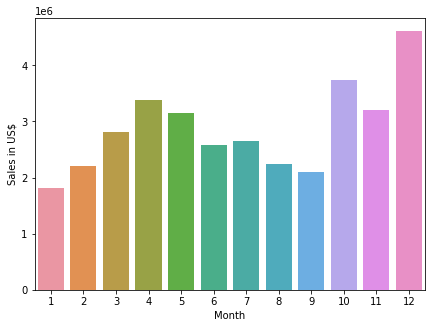

In [65]:
fig = plt.gcf()
fig.set_size_inches(7,5)
#plt.bar(sales.index, sales.values)
sns.barplot(x=sales.index, y=sales.values)
plt.xlabel('Month')
plt.ylabel('Sales in US$')
plt.show()

###What city had the highest number of sales?


In [17]:
df['city'] = [s[s.find(', ')+1:s.rfind(',')+4].strip() for s in df['Purchase Address']]

In [ ]:
df.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_price,city
Order ID,,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [ ]:
df['city'].unique()

array(['Dallas, TX', 'Boston, MA', 'Los Angeles, CA', 'San Francisco, CA',
       'Seattle, WA', 'Atlanta, GA', 'New York City, NY', 'Portland, OR',
       'Austin, TX', 'Portland, ME'], dtype=object)

In [19]:
city_sales =df.groupby('city')[['city','Order_amount']].sum()

In [20]:
city_sales.dtypes

Order_amount    float64
dtype: object

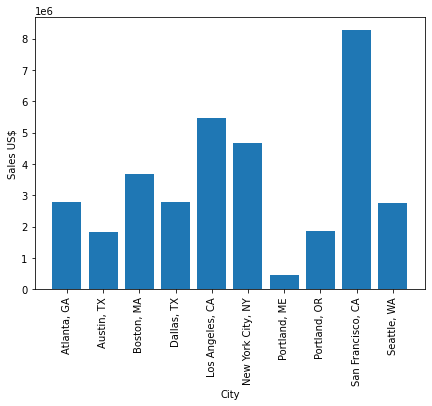

In [67]:
fig = plt.gcf()
fig.set_size_inches(7,5)
plt.bar(city_sales.index, city_sales.Order_amount)
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Sales US$")
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

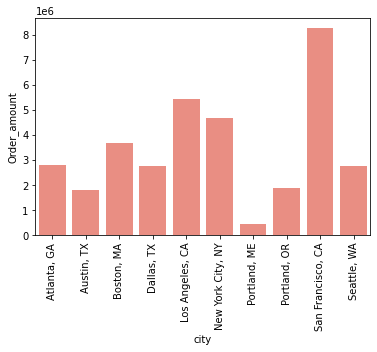

In [22]:
sns.barplot(x=city_sales.index, y=city_sales.Order_amount, color='salmon')
plt.xticks(rotation=90)

###What time should we display advertisements to maximize customer's likelihood of buying product

In [ ]:
df.head(3)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_price,city
Order ID,,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"


In [23]:
df['Hour'] = [x.hour for x in df['Order Date']]

In [ ]:
df.head(3)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_price,city,Hour
Order ID,,,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14


In [25]:
 order_hour = df.groupby('Hour')['Order_amount'].count()

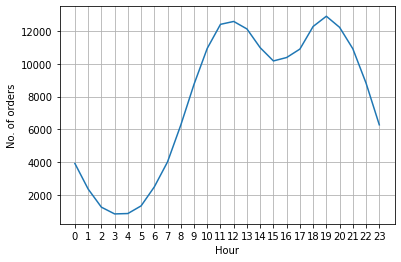

In [ ]:
sns.lineplot(x = order_hour.index, y=order_hour.values)
plt.xticks(ticks=order_hour.index)
plt.xlabel('Hour')
plt.ylabel('No. of orders')
plt.grid()

It is recommended to advertise just before or around the peak order hours.Here it is from 11 to 12 AM and 6 to 7 PM

###The above question can be done citywise to see if and what differences are there

In [ ]:
df.groupby(['city','Hour'])['Order_amount'].count()

city         Hour
Atlanta, GA  0       310
             1       213
             2       113
             3        57
             4        80
                    ... 
Seattle, WA  19      989
             20      988
             21      869
             22      693
             23      551
Name: total_price, Length: 240, dtype: int64

In [26]:
  order_city_hour =df.groupby(['city','Hour'])['Order_amount'].count()

In [27]:
order_city_hour = order_city_hour.reset_index()

In [28]:
order_city_hour

,city,Hour,Order_amount
0,"Atlanta, GA",0,310
1,"Atlanta, GA",1,213
2,"Atlanta, GA",2,113
3,"Atlanta, GA",3,57
4,"Atlanta, GA",4,80
...,...,...,...
235,"Seattle, WA",19,989
236,"Seattle, WA",20,988
237,"Seattle, WA",21,869
238,"Seattle, WA",22,693


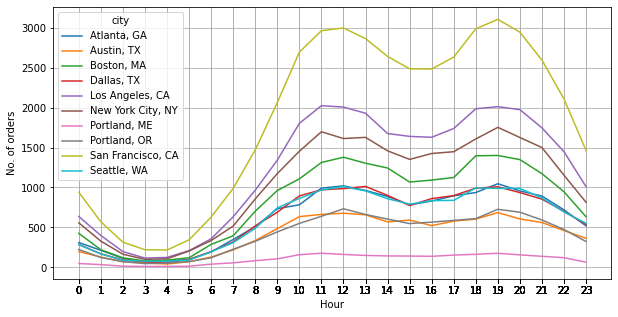

In [29]:
sns.lineplot(x = order_city_hour.Hour, y=order_city_hour.Order_amount, hue=order_city_hour.city)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xticks(ticks=order_city_hour.Hour)
plt.xlabel('Hour')
plt.ylabel('No. of orders')
plt.grid()

###What products are most often sold together?

In [ ]:
df.index.is_unique

False

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_price,city,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9


In [ ]:
df_ = df[df['Order ID'].duplicated(keep=False)]

In [ ]:
df_.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_price,city,Hour
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",19
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",11


In [ ]:
df_['Grouped'] = df_.groupby('Order ID')['Product'].transform(lambda x :','.join(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_price,city,Hour,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [ ]:
df_.shape

(14649, 11)

In [ ]:
df_ = df_[['Order ID','Grouped']].drop_duplicates()

In [ ]:
df_.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
df_.shape

(7136, 2)

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df_['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

print(count.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


The above list shows the most bought together products

###What product sold the most ?Why do you think it sold the most?


In [30]:
df.head(3)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order_amount,city,Hour
Order ID,,,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14


In [ ]:
most_sold = df.groupby('Product')['Quantity Ordered','Price Each'].sum()

In [39]:
most_sold = most_sold.sort_values('Quantity Ordered')

In [40]:
most_sold

,Quantity Ordered,Price Each
Product,,
LG Dryer,646,387600.00
LG Washing Machine,666,399600.00
Vareebadd Phone,2068,826000.00
20in Monitor,4129,451068.99
ThinkPad Laptop,4130,4127958.72
Macbook Pro Laptop,4728,8030800.00
Flatscreen TV,4819,1440000.00
Google Phone,5532,3315000.00
34in Ultrawide Monitor,6199,2348718.19


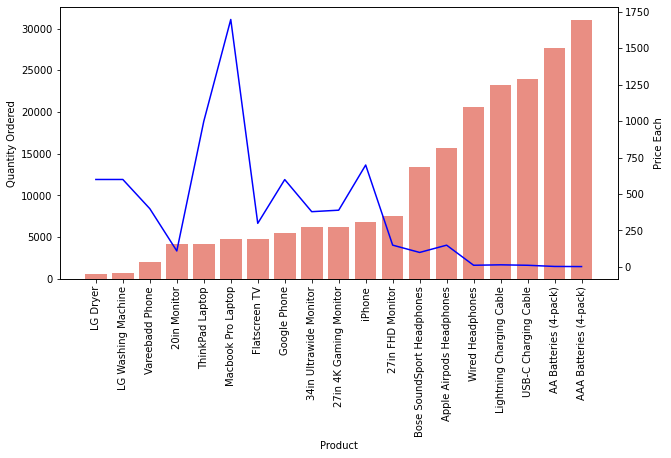

In [64]:
fig = plt.gcf()
fig.set_size_inches(10,5)

g1 = sns.barplot(x=most_sold.index, y=most_sold['Quantity Ordered'], color='salmon')
ax2 = plt.twinx()
g2 = sns.lineplot(x=most_sold.index, y=most_sold['Price Each']/most_sold['Quantity Ordered'], color="blue", ax=ax2)
plt.setp(g1.get_xticklabels(),rotation=90)
plt.ylabel("Price Each")
plt.show()

The most sold products are AAA and AA batteries as seen in the graph.This can be correlated to its price.As it is the lowest priced and highly needed product, more quantity of the same is sold.